![head.png](https://github.com/cafawo/FinancialDataAnalytics/blob/master/figures/head.jpg?raw=1)

# Financial Data Analytics in Python

**Prof. Dr. Fabian Woebbeking**</br>
Assistant Professor of Financial Economics

IWH - Leibniz Institute for Economic Research</br>
MLU - Martin Luther University Halle-Wittenberg

fabian.woebbeking@iwh-halle.de

# Homework: data management

You will need a Git/GitHub repository to submit your course deliverables. Consult [**slides.ipynb**](https://github.com/cafawo/FinancialDataAnalytics) for help with the tasks below! If you need further assistance, do not hesitate to open a Q&A at https://github.com/cafawo/FinancialDataAnalytics/discussions

### Task: 

Use Deribit's `"/public/get_tradingview_chart_data"` API endpoint to download historical price data for **"BTC-PERPETUAL"** with a resolution of $60$ minutes, reaching as far back as possible.

Hint: https://docs.deribit.com/#public-get_tradingview_chart_data

In [2]:
import nest_asyncio
import asyncio
import websockets
import json
import time

# Apply the nest_asyncio patch
nest_asyncio.apply()

# Define the WebSocket message
msg = {
    "jsonrpc": "2.0",
    "id": 1,  # Unique identifier for the request
    "method": "public/get_tradingview_chart_data",
    "params": {
        "instrument_name": "BTC-PERPETUAL",
        "start_timestamp": 0,  # Start timestamp (0 to get as far back as possible)
        "end_timestamp": int(time.time() * 1000),  # End timestamp (current time in milliseconds)
        "resolution": "60"  # Time resolution in minutes
    }
}

async def call_api(msg):
    async with websockets.connect('wss://www.deribit.com/ws/api/v2') as websocket:
        await websocket.send(json.dumps(msg))
        response = await websocket.recv()
        # Process the response
        data = json.loads(response)
        if 'result' in data:
            result = data['result']
            print("Status:", result['status'])
            print()
            print("Close prices:", result['close'])
            print()
            print("Cost bars:", result['cost'])
            print()
            print("High prices:", result['high'])
            print()
            print("Low prices:", result['low'])
            print()
            print("Open prices:", result['open'])
            print()
            print("Ticks (timestamps):", result['ticks'])
            print()
            print("Volume bars:", result['volume'])
        else:
            print("Unexpected response format:", data)

# Run the WebSocket connection and API call
asyncio.get_event_loop().run_until_complete(call_api(msg))



Status: ok

Close prices: [35021.0, 34921.0, 34854.0, 34897.0, 34960.5, 35001.5, 35148.5, 35203.0, 35272.5, 35238.5, 35059.0, 35237.0, 35098.5, 34995.5, 34997.5, 34970.5, 35074.0, 35026.5, 35030.5, 35141.5, 35067.5, 34948.0, 34967.5, 34839.0, 34938.5, 34924.5, 34930.0, 34994.0, 34959.0, 34936.0, 34817.0, 34661.5, 34643.0, 34758.0, 34793.0, 34856.0, 34746.5, 34700.0, 34867.5, 35414.5, 35486.0, 35668.0, 35509.0, 35322.5, 35430.5, 35388.0, 35404.0, 35331.5, 35293.0, 35376.5, 35282.0, 35292.0, 35240.0, 35315.5, 35307.0, 35422.0, 35351.0, 35415.5, 35428.5, 35326.5, 35238.0, 35415.0, 35327.5, 35621.5, 35647.5, 35637.5, 35608.5, 35798.0, 35635.5, 35877.5, 35938.5, 36394.0, 36481.0, 36746.5, 36608.0, 36804.0, 36565.5, 36708.0, 36873.5, 36797.0, 36835.5, 36918.0, 37218.5, 37917.0, 37135.5, 36359.5, 36650.5, 36384.5, 36404.0, 36571.5, 36545.0, 36579.5, 36718.5, 36516.0, 36725.0, 36893.0, 36765.5, 36825.5, 36784.5, 36634.5, 36465.5, 36547.5, 36584.0, 36767.0, 37097.0, 37216.0, 36989.5, 37095.0, 3

### Task: 

Create a Pandas data frame called "ohlc" with the price data from above. Add the following columns:
```Python
ohlc['timestamp'] = pd.to_datetime(ohlc['ticks'], unit='ms')
ohlc['instrument_name'] = "BTC-PERPETUAL"
ohlc['resolution'] = 60
```

Save `ohlc` into a table of the same name inside a database called "07_datam.db".


In [4]:
import nest_asyncio
import asyncio
import websockets
import json
import time
import pandas as pd
import sqlite3

# Apply the nest_asyncio patch
nest_asyncio.apply()

# Define the WebSocket message
msg = {
    "jsonrpc": "2.0",
    "id": 1,  # Unique identifier for the request
    "method": "public/get_tradingview_chart_data",
    "params": {
        "instrument_name": "BTC-PERPETUAL",
        "start_timestamp": 0,  # Start timestamp (0 to get as far back as possible)
        "end_timestamp": int(time.time() * 1000),  # End timestamp (current time in milliseconds)
        "resolution": "60"  # Time resolution in minutes
    }
}

async def call_api(msg):
    async with websockets.connect('wss://www.deribit.com/ws/api/v2') as websocket:
        await websocket.send(json.dumps(msg))
        response = await websocket.recv()
        data = json.loads(response)
        return data

# Run the WebSocket connection and API call
result = asyncio.get_event_loop().run_until_complete(call_api(msg))

if result and result.get('result', {}).get('status') == 'ok':
    # Create a DataFrame from the result
    ohlc = pd.DataFrame({
        'timestamp': pd.to_datetime(result['result']['ticks'], unit='ms'),
        'open': result['result']['open'],
        'high': result['result']['high'],
        'low': result['result']['low'],
        'close': result['result']['close'],
        'volume': result['result']['volume'],
        'cost': result['result']['cost']
    })

    # Add additional columns
    ohlc['instrument_name'] = "BTC-PERPETUAL"
    ohlc['resolution'] = 60

    # Print the DataFrame
    print(ohlc)

    # Save DataFrame to SQLite database
    conn = sqlite3.connect('07_datam.db')
    ohlc.to_sql('ohlc', conn, if_exists='replace', index=False)
    conn.close()

    print("Data saved to database '07_datam.db' in table 'ohlc'.")
else:
    print("Failed to retrieve or process data.")



               timestamp     open     high      low    close      volume  \
0    2023-11-06 03:00:00  34945.0  35036.5  34882.0  35021.0  227.376577   
1    2023-11-06 04:00:00  35021.0  35070.0  34882.5  34921.0  347.502443   
2    2023-11-06 05:00:00  34920.5  34945.5  34772.5  34854.0  617.273957   
3    2023-11-06 06:00:00  34854.0  34921.0  34810.0  34897.0  261.885823   
4    2023-11-06 07:00:00  34897.0  34972.0  34855.5  34960.5  344.823243   
...                  ...      ...      ...      ...      ...         ...   
4996 2024-06-01 07:00:00  67657.0  67699.5  67537.0  67594.0  105.096337   
4997 2024-06-01 08:00:00  67594.0  67697.0  67572.0  67663.0   33.585908   
4998 2024-06-01 09:00:00  67663.0  67708.5  67608.5  67669.0   18.481782   
4999 2024-06-01 10:00:00  67669.0  67701.0  67611.0  67611.0   42.165924   
5000 2024-06-01 11:00:00  67600.0  67651.5  67600.0  67649.5   18.447334   

            cost instrument_name  resolution  
0      7949190.0   BTC-PERPETUAL        

### Task: 

Create a Python `class DataHandler` that connects to 07_datam.db. The class should have functions that:
* download and save,
* select and return, and
* display data as a plot (e.g. the last price over time).

Data saved to database '07_datam.db' in table 'ohlc'.


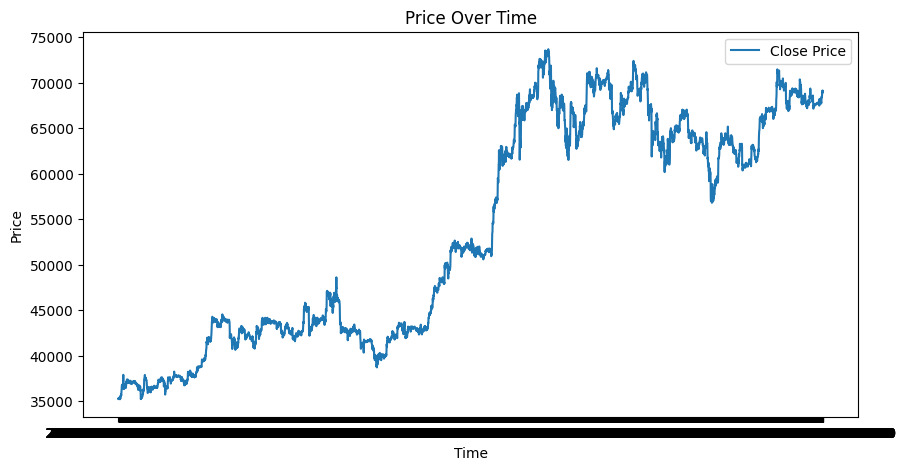

In [2]:
import nest_asyncio
import asyncio
import websockets
import json
import time
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# Apply the nest_asyncio patch
nest_asyncio.apply()

class DataHandler:
    def __init__(self, db_name='07_datam.db'):
        self.db_name = db_name

    async def _call_api(self, msg):
        async with websockets.connect('wss://www.deribit.com/ws/api/v2') as websocket:
            await websocket.send(json.dumps(msg))
            response = await websocket.recv()
            data = json.loads(response)
            return data

    def download_and_save(self, instrument_name="BTC-PERPETUAL", resolution=60):
        msg = {
            "jsonrpc": "2.0",
            "id": 1,
            "method": "public/get_tradingview_chart_data",
            "params": {
                "instrument_name": instrument_name,
                "start_timestamp": 0,
                "end_timestamp": int(time.time() * 1000),
                "resolution": str(resolution)
            }
        }

        result = asyncio.get_event_loop().run_until_complete(self._call_api(msg))

        if result and result.get('result', {}).get('status') == 'ok':
            ohlc = pd.DataFrame({
                'timestamp': pd.to_datetime(result['result']['ticks'], unit='ms'),
                'open': result['result']['open'],
                'high': result['result']['high'],
                'low': result['result']['low'],
                'close': result['result']['close'],
                'volume': result['result']['volume'],
                'cost': result['result']['cost']
            })
            ohlc['instrument_name'] = instrument_name
            ohlc['resolution'] = resolution

            conn = sqlite3.connect(self.db_name)
            ohlc.to_sql('ohlc', conn, if_exists='replace', index=False)
            conn.close()
            print(f"Data saved to database '{self.db_name}' in table 'ohlc'.")
        else:
            print("Failed to retrieve or process data.")

    def select_and_return(self, query):
        conn = sqlite3.connect(self.db_name)
        df = pd.read_sql_query(query, conn)
        conn.close()
        return df

    def display_plot(self, df, title='Price Over Time'):
        plt.figure(figsize=(10, 5))
        plt.plot(df['timestamp'], df['close'], label='Close Price')
        plt.xlabel('Time')
        plt.ylabel('Price')
        plt.title(title)
        plt.legend()
        plt.show()

# Example Usage
if __name__ == "__main__":
    handler = DataHandler()

    # Download and save data
    handler.download_and_save()

    # Select and return data
    df = handler.select_and_return("SELECT * FROM ohlc")

    # Display data as a plot
    handler.display_plot(df)
